In [17]:
%matplotlib notebook
# %matplotlib inline

import scipy.io as sio

import numpy as np
import math
import os
import matplotlib
import matplotlib.pyplot as plt
import datetime
import time
import quantities as pq


from ripple_detection import Karlsson_ripple_detector, Kay_ripple_detector
from ripple_detection.simulate import simulate_time
import scipy.stats

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [18]:
data = sio.loadmat('../../data/lfpTrace_ripples.mat')
run_info = sio.loadmat('../../their_analysis/m4008_20180423_session025_runSpeed.mat')


X = data['lfp'].flatten()
ripple_loc = (data['rippleLocs'].T).flatten()
Y = np.zeros_like(X)
Y[ripple_loc] = 1

run_info = run_info['run_speed'].flatten()

In [19]:
SAMPLING_FREQUENCY = 2.5e3
n_samples = data['lfp'].shape[0]
time = simulate_time(n_samples, SAMPLING_FREQUENCY)
speed = np.ones_like(time)

LFPs = data['lfp']

In [20]:
LFPs.shape

(1507744, 1)

In [21]:
Karlsson_ripple_times = Karlsson_ripple_detector(time, LFPs, speed, SAMPLING_FREQUENCY)
Kay_ripple_times = Kay_ripple_detector(time, LFPs, speed, SAMPLING_FREQUENCY)

# display(Karlsson_ripple_times)

/Users/astasik/anaconda3/envs/machine/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


<Figure size 1080x720 with 0 Axes>

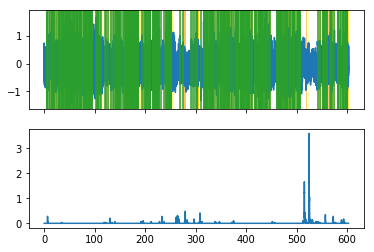

In [10]:
plt.figure(figsize=(15, 10))

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)


ax1.plot(time, LFPs)
for ripple in Karlsson_ripple_times.itertuples():
    ax1.axvspan(ripple.start_time, ripple.end_time, alpha=0.3, color='red', zorder=0)
for ripple in Kay_ripple_times.itertuples():
    ax1.axvspan(ripple.start_time, ripple.end_time, alpha=0.3, color='yellow', zorder=0) 
for ripple in ripple_loc:
    ax1.axvline(time[ripple], color='C2')
ax2.plot(time[:-1], run_info)
f.show()

<IPython.core.display.Javascript object>


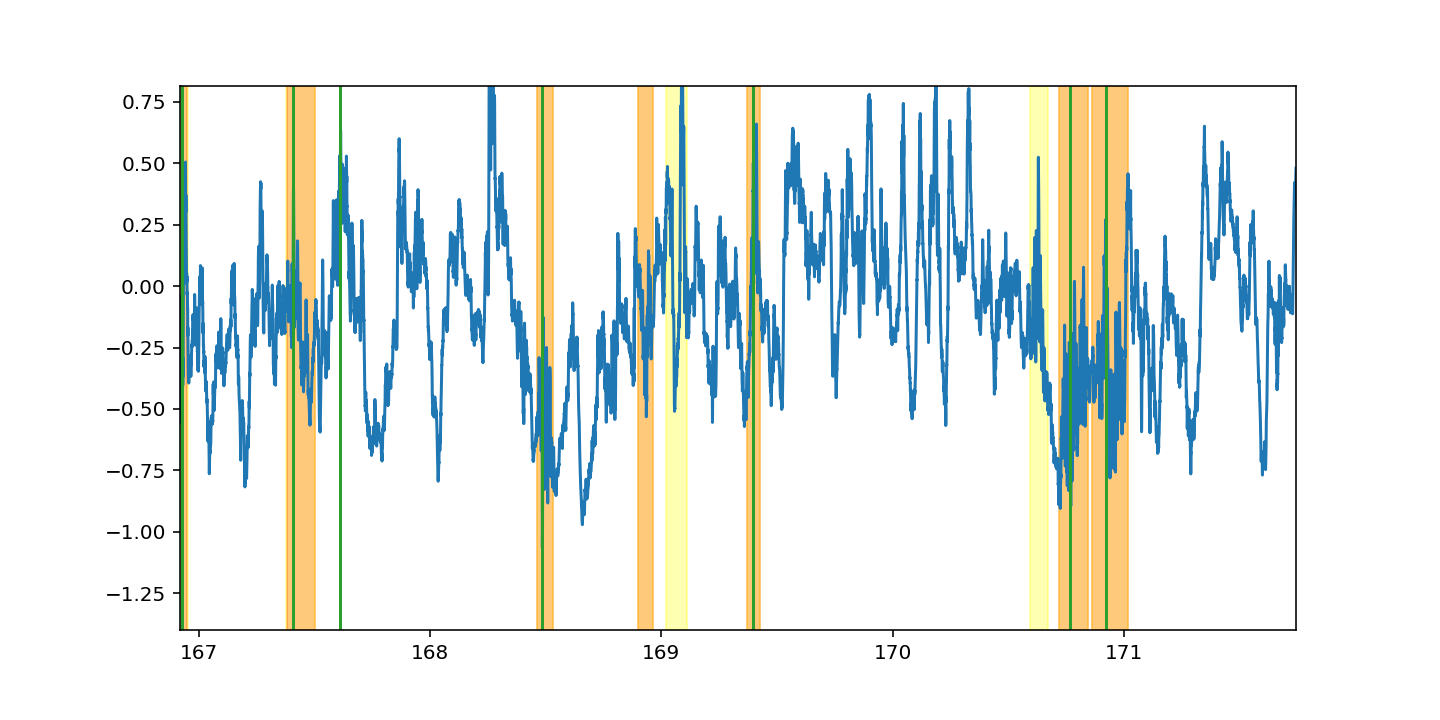

In [23]:
plt.figure(figsize=(10, 5))
plt.plot(time, LFPs)
for ripple in Karlsson_ripple_times.itertuples():
    plt.axvspan(ripple.start_time, ripple.end_time, alpha=0.3, color='red', zorder=0)
for ripple in Kay_ripple_times.itertuples():
    plt.axvspan(ripple.start_time, ripple.end_time, alpha=0.3, color='yellow', zorder=0) 
for ripple in ripple_loc:
    plt.axvline(time[ripple], color='C2')
# plt.xlim(141, 145)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../plots/algo_1/0.pdf'

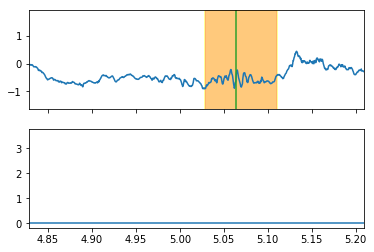

In [7]:
for i, ripple in enumerate(Karlsson_ripple_times.itertuples()):
    f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
    
    ax1.plot(time, LFPs)
    ax1.axvspan(ripple.start_time, ripple.end_time, alpha=0.3, color='red', zorder=0)
    ax1.set_xlim(ripple.start_time-0.2, ripple.end_time+0.1)
    
    for ripple2 in Kay_ripple_times.itertuples():
        ax1.axvspan(ripple2.start_time, ripple2.end_time, alpha=0.3, color='yellow', zorder=0)
    for ripple_true in ripple_loc:
        ax1.axvline(time[ripple_true], color='C2')
        
    ax2.plot(time[:-1], run_info)
    
    path = os.path.join('..', 'plots', 'algo_1', str(i)+'.pdf')
    f.savefig(path)
    plt.close()
    
    
for i, ripple in enumerate(Kay_ripple_times.itertuples()):
    f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
    
    ax1.plot(time, LFPs)
    ax1.axvspan(ripple.start_time, ripple.end_time, alpha=0.3, color='yellow', zorder=0)
    ax1.set_xlim(ripple.start_time-0.2, ripple.end_time+0.1)
    
    for ripple2 in Karlsson_ripple_times.itertuples():
        ax1.axvspan(ripple2.start_time, ripple2.end_time, alpha=0.3, color='red', zorder=0)
    for ripple_true in ripple_loc:
        ax1.axvline(time[ripple_true], color='C2')
        
    ax2.plot(time[:-1], run_info)
    
    path = os.path.join('..', '..', 'plots', 'algo_2', str(i)+'.pdf')
    f.savefig(path)
    plt.close()
    
    
for i, ripple in enumerate(ripple_loc):
    f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
    
    ax1.plot(time, LFPs)
    ax1.axvline(time[ripple], color='C2')
    ax1.set_xlim(time[ripple]-0.3, time[ripple]+0.2)
    
    for ripple2 in Karlsson_ripple_times.itertuples():
        ax1.axvspan(ripple2.start_time, ripple2.end_time, alpha=0.3, color='red', zorder=0)
    for ripple2 in Kay_ripple_times.itertuples():
        ax1.axvspan(ripple2.start_time, ripple2.end_time, alpha=0.3, color='yellow', zorder=0)
        
    ax2.plot(time[:-1], run_info)
    
    path = os.path.join('..', '..', 'plots', 'algo_anna', str(i)+'.pdf')
    f.savefig(path)
    plt.close()

In [ ]:
start_1 = Karlsson_ripple_times['start_time'].values
end_1 = Karlsson_ripple_times['end_time'].values

start_2 = Kay_ripple_times['start_time'].values
end_2 = Kay_ripple_times['end_time'].values

ripples = time[ripple_loc]
count = np.zeros_like(ripples)


for i in range(len(ripples)):
    for j in range(len(start_1)):
        if np.logical_and(start_1[j]<=ripples[i], end_1[j]>=ripples[i]):
            count[i] = 1
    for j in range(len(start_2)):
        if np.logical_and(start_2[j]<=ripples[i], end_2[j]>=ripples[i]):
            count[i] = 1

In [ ]:
sum(count)/len(count)

In [ ]:
len(ripples), len(start_1), len(start_2)